# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Farrel Paksi Aditya
- **Email:** farrelpaksiaditya@gmail.com
- **ID Dicoding:** farrelllllll

## Menentukan Pertanyaan Bisnis

- Kategori barang mana saja yang paling  banyak memperoleh reviews terbaik dan terburuk?
- Kategori barang atau items apa saja yang paling banyak terjual berdasarkan lokasinya?
- Di mana lokasi Seller dengan pendapatan terbanyak?
- Kategori barang apa saja yang menghasilkan freight value (ongkir) terbanyak dan paling sedikit?
- Kapan terakhir kali pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak total pengeluaran pelanggan dalam beberapa bulan terakhir?



## Import Semua Packages/Library yang Digunakan

In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [418]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Wrangling

### Gathering Data

In [419]:
# Load dataset customers
customers_df = pd.read_csv('customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [420]:
# Load dataset orders
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [421]:
# Load dataset order_items
order_items_df = pd.read_csv('order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [422]:
# Load dataset order_payments
order_payments_df = pd.read_csv('order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [423]:
# Load dataset order_reviews
order_reviews_df = pd.read_csv('order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [424]:
# Load dataset products
products_df = pd.read_csv('products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [425]:
# Load dataset sellers
sellers_df = pd.read_csv('sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Dataset customers_dataset memiliki atribut seperti **customer_id, customer_unique_id, customer_zip_code_prefix, customer_city,customer_state.**
- Dataset orders_dataset memiliki atribut seperti **order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date.**
- Dataset order_items_dataset memiliki atribut seperti **order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value.**
- Dataset order_payments_dataset memiliki atribut seperti **order_id,	payment_sequential,	payment_type, payment_installments, payment_value.**
- Dataset order_reviews_dataset memiliki atribut seperti **review_id,	order_id,	review_score,	review_comment_title,	review_comment_message,	review_creation_date,	review_answer_timestamp.**
- Dataset products_dataset memiliki atribut
 seperti **product_id,	product_category_name,	product_name_lenght,	product_description_lenght,	product_photos_qty,	product_weight_g,	product_length_cm,	product_height_cm,	product_width_cm.**
- Dataset sellers_dataset memiliki atribut seperti **seller_id,	seller_zip_code_prefix,	seller_city,	seller_state.**

### Assessing Data

## **Dataset customers**

In [426]:
# Mencari nilai dataset customers_dataset
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [427]:
# Cek Null Value
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [428]:
# Cek duplikasi data
print('Jumlah duplikasi data:', customers_df.duplicated().sum())

Jumlah duplikasi data: 0


In [429]:
# Cek nilai statistik dataset customers
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


## **Dataset order_items**

In [430]:
# Mencari nilai dataset order_items
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [431]:
# Cek Null Value
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [432]:
# Cek duplikasi data
print('Jumlah duplikasi data:', order_items_df.duplicated().sum())

Jumlah duplikasi data: 0


In [433]:
# Cek nilai statistik dataset order_items
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


## **Dataset order_payments**

In [434]:
# Mencari nilai dataset order_payments
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [435]:
# Cek Null Value
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [436]:
# Cek duplikasi data
print('Jumlah duplikasi data:', order_payments_df.duplicated().sum())

Jumlah duplikasi data: 0


In [437]:
# Cek nilai statistik dataset order_payments
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


## **Dataset order_reviews**

In [438]:
# Mencari nilai dataset order_reviews
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [439]:
# Cek Null Value
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [440]:
# Cek duplikasi data
print('Jumlah duplikasi data:', order_reviews_df.duplicated().sum())

Jumlah duplikasi data: 0


In [441]:
# Cek nilai statistik dataset order_reviews
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## **Dataset orders**

In [442]:
# Mencari nilai dataset orders
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [443]:
# Cek Null Value
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [444]:
# Cek duplikasi data
print('Jumlah duplikasi data:', orders_df.duplicated().sum())

Jumlah duplikasi data: 0


In [445]:
# Cek nilai statistik dataset orders
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


## **Dataset products**

In [446]:
# Mencari nilai dataset products
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [447]:
# Cek Null Value
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [448]:
# Cek duplikasi data
print('Jumlah duplikasi data:', products_df.duplicated().sum())

Jumlah duplikasi data: 0


In [449]:
# Cek nilai statistik dataset products
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


## **Dataset sellers**

In [450]:
# Mencari nilai dataset sellers
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [451]:
# Cek Null Value
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [452]:
# Cek duplikasi data
print('Jumlah duplikasi data:', sellers_df.duplicated().sum())

Jumlah duplikasi data: 0


In [453]:
# Cek nilai statistik dataset sellers
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
## **Dataset customers**
- Dataset customers_dataset memiliki total rows sebanyak 99441 dan total columns 5.
- Dataset customers_dataset tidak memiliki Null Value dan tidak memiliki duplikasi di dalamnya.

## **Dataset order_items**
- Dataset order_items_dataset memiliki total rows sebanyak 112650 dan total columns 7.
- Dataset order_items_dataset tidak memiliki Null Value dan tidak memiliki duplikasi di dalamnya.
- Pada kolom shipping_limit_date, memiliki tipe data yang tidak sesuai (object harus diubah ke datetime).

## **Dataset order_payments**
- Dataset order_payments_dataset memiliki total rows sebanyak 103886 dan total columns 5.
- Dataset order_payments_dataset tidak memiliki Null Value dan tidak memiliki duplikasi di dalamnya.

## **Dataset order_reviews**
- Dataset order_reviews_dataset memiliki total rows sebanyak 99224 dan total columns 7.
- Dataset order_reviews_dataset memiliki beberapa Null Value pada beberapa kolom atau atribut:


1.   Kolom review_comment_title	memiliki Null Value sebanyak 87656 rows.
2.   Kolom review_comment_message	memiliki Null Value sebanyak 58247 rows.

- Dataset order_reviews_dataset tidak memiliki duplikasi di dalamnya.
- Pada kolom **review_creation_date, review_answer_timestamp** memiliki tipe data yang tidak sesuai (object harus diubah ke datetime).

## **Dataset orders**
- Dataset orders_dataset memiliki total rows sebanyak 99441 dan total columns 8.
- Dataset orders_dataset memiliki beberapa Null Value pada beberapa kolom atau atribut:


1.   Kolom order_approved_at memiliki Null Value sebanyak 160 rows.
2.   Kolom order_delivered_carrier_date	memiliki Null Value sebanyak 1783 rows.

1.   Kolom order_delivered_customer_date memiliki Null Value sebanyak 2965 rows.

- Dataset orders_dataset tidak memiliki duplikasi di dalamnya.
- Pada kolom **order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date** memiliki tipe data yang tidak sesuai (object harus diubah ke datetime).

## **Dataset products**
- Dataset products_dataset memiliki total rows sebanyak 32951 dan total columns 9.
- Dataset products_dataset memiliki beberapa Null Value pada beberapa kolom atau atribut:


1.   Kolom **product_category_name, product_name_lenght, product_description_lenght, product_photos_qty** memiliki Null Value sebanyak 610 rows.
2.   Kolom **product_weight_g, product_length_cm, product_height_cm, product_width_cm** memiliki Null Value sebanyak 2 rows.

- Dataset products_dataset tidak memiliki duplikasi di dalamnya.

## **Dataset sellers**
- Dataset sellers_dataset memiliki total rows sebanyak 3095 dan total columns 4.
- Dataset sellers_dataset tidak memiliki Null Value dan tidak memiliki duplikasi di dalamnya.


### Cleaning Data

## **Cleaning dataset order_items**

In [454]:
# Membersihkan dataset order_items
# Mengubah tipe data pada kolom shipping_limit_date dari object menjadi datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


## **Cleaning dataset order_reviews**

In [455]:
# Membersihkan dataset order_reviews
# Mengubah tipe data pada kolom review_creation_date dari object menjadi datetime
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
# Mengubah tipe data pada kolom review_answer_timestamp dari object menjadi datetime
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [456]:
# Menghitung nilai yang paling sering muncul pada kolom review_comment_title
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [457]:
# Mengubah nilai pada kolom review_comment_title dari recomendo menjadi Recomendo
order_reviews_df.loc[order_reviews_df['review_comment_title'] == 'recomendo', 'review_comment_title'] = 'Recomendo'
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,768
Bom,293
super recomendo,270
Excelente,248
Muito bom,247
...,...
"Muito, entregou antes do",1
medidas do produto,1
"Bom, porem não otimo",1


In [458]:
# Mengisi Null Value pada kolom review_comment_title dengan Recomendo
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('Recomendo')
# Cek Null Value
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [459]:
# Menghitung nilai yang paling sering muncul pada kolom review_comment_message
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


In [460]:
# Mengubah nilai pada kolom review_comment_message dari muito bom menjadi Muito bom
order_reviews_df.loc[order_reviews_df['review_comment_message'] == 'muito bom', 'review_comment_message'] = 'Muito bom'
# Mengubah nilai pada kolom review_comment_message dari bom menjadi Bom
order_reviews_df.loc[order_reviews_df['review_comment_message'] == 'bom', 'review_comment_message'] = 'Bom'
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,352
Bom,296
Recomendo,100
Otimo,99
otimo,96
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


In [461]:
# Mengisi Null Value pada kolom review_comment_title secara acak dengan Muito bom dan Bom
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna(np.random.choice(['Muito bom', 'Bom']))
# Cek Null Value
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


## **Cleaning dataset orders**

In [462]:
# Membersihkan dataset orders
# Mengubah tipe data pada kolom order_purchase_timestamp dari object menjadi datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
# Mengubah tipe data pada kolom order_approved_at dari object menjadi datetime
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
# Mengubah tipe data pada kolom order_delivered_customer_date dari object menjadi datetime
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
# Mengubah tipe data pada kolom order_delivered_carrier_date dari object menjadi datetime
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
# Mengubah tipe data pada kolom order_estimated_delivery_date dari object menjadi datetime
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [463]:
# Mengisi nilai pada kolom order_delivered_customer_date dengan nilai order_estimated_delivery_date
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(orders_df['order_estimated_delivery_date'])

In [464]:
# Mengisi nilai pada kolom order_delivered_carrier_date dengann nilai order_delivered_customer_date
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(orders_df['order_delivered_customer_date'])

In [465]:
# Drop Null Value pada kolom order_approved_at
orders_df = orders_df.dropna(subset=['order_approved_at'])

In [466]:
# Cek Null Value
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


## **Cleaning dataset products**

In [467]:
# Membersihkan dataset products
# Menghitung nilai yang paling sering muncul pada kolom product_category_name
products_df.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [468]:
# Mengisi Null Value pada kolom product_category_name secara acak dengan cama_mesa_banho dan esporte_lazer
products_df['product_category_name'] = products_df['product_category_name'].fillna(np.random.choice(['cama_mesa_banho', 'esporte_lazer']))

In [469]:
# Mengisi Null Value pada kolom product_name_lenght dengan mean
products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].mean())
# Mengisi Null Value pada kolom product_description_lenght dengan mean
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].mean())
# Mengisi Null Value pada kolom product_photos_qty dengan mean
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].mean())

In [470]:
# Drop Null Value pada kolom product_weight_g, product_length_cm, product_height_cm, product_width_cm
products_df = products_df.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])

In [471]:
# Cek Null Value
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**Insight:**

## **Dataset order_items**
- Mengubah tipe data pada kolom shipping_limit_date dari object menjadi datetime.

## **Dataset order_reviews**
- Mengubah tipe data pada kolom review_creation_date, review_answer_timestamp dari object menjadi datetime.
- Mengisi Null Value pada kolom review_comment_title dengan nilai yang paling sering muncul pada kolom tersebut, yaitu Recomendo. Namun, terdapat kesamaan nilai pada urutan kedua, yaitu recomendo. Maka dari itu, saya ubah recomendo menjadi Recomendo agar struktur huruf nya sama karena mereka satu kata hanya beda huruf besar dan kecilnya.
- Mengisi Null Value pada kolom review_comment_message dengan nilai yang paling sering muncul pada kolom tersebut, yaitu Muito bom dan Bom dengan acak karena keduanya memiliki selisih yang sedikit. Namun, terdapat kesamaan pada keduanya yang memiliki kata sama hanya beda hurus, yaitu muito bom dan bom. Maka dari itu, saya ubah muito bom menjadi Muito bom dan bom menjadi Bom agar memiliki struktur huruf yang sama.

## **Dataset orders**
- Mengubah tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date dari object menjadi datetime.
- Drop Null Value pada kolom order_approved_at karena hanya memiliki Null Value sebanyak 160 rows dari total rows sebanyak 99441.
- Mengisi Null Value pada kolom order_delivered_customer_date dengan nilai yang sejajar barisnya antara Null Value pada kolom order_delivered_customer_date dengan nilai yang ada pada kolom order_estimated_delivery_date. Begitupun kolom order_delivered_carrier_date yang Null Value nya diisi dengan nilai yang sejajar barisnya dengan nilai pada kolom order_delivered_customer_date. Mengapa demikian? Karena nilai yang diambil merupakan nilai estimasi sesuai dengan namanya. Jadi dengan nilai estimasi tersebut, kita dapat memperkirakan nilai-nilai pada kolom-kolom yang memiliki Null Value.

## **Dataset products**
- Drop Null Value pada kolom product_weight_g, product_length_cm, product_height_cm, product_width_cm karena hanya memiliki Null Value sebanyak 2 rows dari total rows sebanyak 32951 rows.
- Mengisi Null Value pada kolom product_category_name dengan yang paling sering muncul pada kolom tersebut, yaitu cama_mesa_banho dan esporte_lazer dengan acak karena keduanya memiliki selisih yang sedikit.
- Mengisi Null Value pada kolom product_weight_g, product_length_cm, product_height_cm, product_width_cm dengan nilai mean dari masing-masing kolom tersebut.


## Exploratory Data Analysis (EDA)

### Explore customers_df untuk persebaran jumlah pelanggan pada setiap city dan state

In [472]:
# Persebaran jumlah pelanggan pada setiap city dan state pada dataset customers
customers_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [473]:
customers_df.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### Explore gabungan (join) dataset order_items dengan dataset products untuk menghasilkan kategori produk yang menghasilkan freight_value (ongkir) terbanyak dan paling sedikit

In [474]:
# Left join dataset order_items dengan dataset products
order_items_products_df = pd.merge(
    left=order_items_df,
    right=products_df,
    on='product_id',
    how='left'
    )
order_items_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [475]:
# Kategori products yang menghasilkan freight_value (ongkir) terbanyak dan paling sedikit
order_items_products_df.groupby(by='product_category_name').freight_value.sum().sort_values(ascending=False)

,freight_value
product_category_name,
cama_mesa_banho,204693.04
esporte_lazer,196529.08
beleza_saude,182566.73
moveis_decoracao,172749.30
informatica_acessorios,147318.08
...,...
portateis_cozinha_e_preparadores_de_alimentos,309.76
cds_dvds_musicais,224.99
pc_gamer,133.57


### Explore gabungan (join) dataset order_items_products_df dengan dataset order_reviews untuk menghasilkan kategori produk paling banyak memperoleh reviews terbaik

In [476]:
# Left join dataset order_items_products_df dengan dataset order_reviews
order_items_products_reviews_df = pd.merge(
    left=order_items_products_df,
    right=order_reviews_df,
    on='order_id',
    how='left'
    )
order_items_products_reviews_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,650.0,28.0,9.0,14.0,97ca439bc427b48bc1cd7177abe71365,5.0,Recomendo,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,30000.0,50.0,30.0,40.0,7b07bacd811c4117b742569b04ce3580,4.0,Recomendo,Muito bom,2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,3050.0,33.0,13.0,33.0,0c5b33dea94867d1ac402749e5438e8b,5.0,Recomendo,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,200.0,16.0,10.0,15.0,f4028d019cb58564807486a6aaf33817,4.0,Recomendo,Muito bom,2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,3750.0,35.0,40.0,30.0,940144190dcba6351888cafa43f3a3a5,5.0,Recomendo,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59


In [477]:
# Kategori products paling banyak memperoleh reviews terbaik
order_items_products_reviews_df.groupby(by='product_category_name').review_score.mean().sort_values(ascending=False)

,review_score
product_category_name,
cds_dvds_musicais,4.642857
fashion_roupa_infanto_juvenil,4.500000
livros_interesse_geral,4.446266
construcao_ferramentas_ferramentas,4.444444
flores,4.419355
...,...
moveis_escritorio,3.493183
pc_gamer,3.333333
portateis_cozinha_e_preparadores_de_alimentos,3.266667


### Explore gabungan (join) dataset order_items dengan dataset sellers untuk menghasilkan lokasi sellers dengan pendapatan terbanyak berdasarkan city dan state

In [478]:
# Left join dataset order_items dengan dataset sellers
order_items_sellers_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    on='seller_id',
    how='left'
    )
order_items_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [479]:
# Lokasi sellers dengan pendapatan terbanyak
# Berdasarkan city
order_items_sellers_df.groupby(by='seller_city').price.sum().sort_values(ascending=False)

,price
seller_city,
sao paulo,2702878.14
ibitinga,624592.94
curitiba,470759.82
rio de janeiro,358413.59
guarulhos,329494.38
...,...
resende,19.99
floranopolis,19.98
jarinu,14.63


In [480]:
# Berdasarkan state
order_items_sellers_df.groupby(by='seller_state').price.sum().sort_values(ascending=False)

,price
seller_state,
SP,8753396.21
PR,1261887.21
MG,1011564.74
RJ,843984.22
SC,632426.07
RS,378559.54
BA,285561.56
DF,97749.48
PE,91493.85


In [481]:
# Mengelompokan city berdasarkan state nya
order_items_sellers_df.groupby(by='seller_state').seller_city.value_counts().sort_values(ascending=False)

seller_state  seller_city          
SP            sao paulo                27983
              ibitinga                  7750
              santo andre               2964
PR            curitiba                  2944
SP            sao jose do rio preto     2579
                                       ...  
RJ            04482255                     1
PR            uniao da vitoria             1
              palotina                     1
              medianeira                   1
SP            vila velha                   1
Name: count, Length: 636, dtype: int64

### Explore gabungan (join) dataset order_items_products_df dengan dataset sellers untuk menghasilkan kategori produk paling banyak terjual berdasarkan city dan state

In [482]:
# Left join dataset order_items_products_df dengan dataset sellers
order_items_products_sellers_df = pd.merge(
    left=order_items_products_df,
    right=sellers_df,
    on='seller_id',
    how='left'
    )
order_items_products_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR


In [483]:
# Kategori products paling banyak terjual berdasarkan lokasinya
# Berdasarkan city
order_items_products_sellers_df.groupby(by='seller_city').product_category_name.value_counts().sort_values(ascending=False)

seller_city  product_category_name      
ibitinga     cama_mesa_banho                6039
sao paulo    telefonia                      2930
             moveis_decoracao               2912
             esporte_lazer                  2109
             cool_stuff                     1970
                                            ... 
medianeira   beleza_saude                      1
maua         papelaria                         1
             fashion_bolsas_e_acessorios       1
             eletroportateis                   1
xaxim        papelaria                         1
Name: count, Length: 3248, dtype: int64

In [484]:
# Berdasarkan state
order_items_products_sellers_df.groupby(by='seller_state').product_category_name.value_counts().sort_values(ascending=False)

seller_state  product_category_name
SP            cama_mesa_banho          9818
              esporte_lazer            6601
              beleza_saude             6404
              moveis_decoracao         6256
              utilidades_domesticas    4952
                                       ... 
PE            casa_conforto               1
              audio                       1
PB            eletronicos                 1
MS            climatizacao                1
SP            la_cuisine                  1
Name: count, Length: 503, dtype: int64

### Explore dataset order_payments untuk menampilkan metode pembayaran yang menghasilkan payment_value terbanyak. Juga menggabungkan (join) dataset orders dengan dataset order_payments. Lalu, gabungkan (join) lagi dataset hasil gabungan dari orders dan order_payments dengan dataset customers, untuk menampilkan metode pembayaran dengan payment_value terbanyak berdasarkan customer_state

In [485]:
# Menampilkan metode payments dengan payment_value terbanyak
order_payments_df.groupby(by='payment_type').payment_value.sum().sort_values(ascending=False)

,payment_value
payment_type,
credit_card,12542084.19
boleto,2869361.27
voucher,379436.87
debit_card,217989.79
not_defined,0.00


In [486]:
# Left join dataset orders dengan dataset order_payments
orders_payments_df = pd.merge(
    left=orders_df,
    right=order_payments_df,
    on='order_id',
    how='left'
    )
orders_payments_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12


In [487]:
# Left join dataset orders_payments_df dengan dataset customers
orders_payments_customers_df = pd.merge(
    left=orders_payments_df,
    right=customers_df,
    on='customer_id',
    how='left'
    )
orders_payments_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [488]:
# Menampilkan metode pembayaran dengan payment_value terbanyak berdasarkan customers_state
orders_payments_customers_df.groupby(by='customer_state').payment_type.value_counts().sort_values(ascending=False)

,,count
customer_state,payment_type,
SP,credit_card,32139
RJ,credit_card,10280
MG,credit_card,9066
SP,boleto,8193
RS,credit_card,3982
...,...,...
TO,debit_card,4
AP,voucher,3
RO,debit_card,3


**Insight:**
## **Dataset customers**
- Menampilkan persebaran customers berdasarkan city, dapat dilihat bahwa, customers terbanyak berada di kota sao paulo dengan jumlah sebanyak 15540. Dan paling sedikit berada di kota ibiara, rio espera, rio dos indios, rio dos cedros, lagoao dengan jumlah sebanyak 1. Untuk hal ini, mungkin masih ada beberapa kota dengan jumlah customers sebanyak 1, tetapi yang ditampilkan hanya sebagian karena keterbatasan tempat.
- Menampilkan persebaran customers berdasarkan state, dapat dilihat bahwa, customers terbanyak berada di negara bagian SP dengan jumlah sebanyak 417646. Dan paling sedikit berada di negara bagian RR dengan jumlah sebanyak 46

## **Dataset order_items_products_df**
- Berdasarkan hasil, kategori produk dengan nama cama_mesa_banho, memiliki total ongkir terbanyak sebesar 232614.61, sedangkan kategori produk dengan nama seguros_e_servicos, memiliki total ongkir paling sedikit sebesar 41.22. Dengan begini, kita dapat melihat bahwa kategori produk yang paling banyak dan paling sedikit terjual berdasarkan total ongkirnya.

## **Dataset order_items_products_reviews_df**
- Ini digunakan untuk menampilkan rata-rata nilai review_score pada semua kategori produk yang ada, mulai dari nilai review_score yang tertinggi hingga terendah. Dapat dilihat bahwa, kategori produk dengan nama cds_dvds_musicais memiliki nilai review_score tertinggi dengan perolehan nilai rata-rata sebesar 4.64, sedangkan untuk yang terendah, dimiliki oleh seguros_e_servicos dengan perolehan nilai rata-rata sebesar 2.50.

## **Dataset order_items_sellers_df**
- Menampilkan lokasi seller dengan pendapatan terbanyak hinggan paling sedikit, untuk lokasi berdasarkan city dan state. Pada kasus berdasarkan city, dapat dilihat bahwa kota seller dengan pendapatan terbanyak adalah sao paulo dengan total 2702878.14. Sedangkan, kota seller dengan pendapatan paling sedikit adalah palotina dengan total 9.99.
- Pada kasus berdasarkan state, dapat dilihat bahwa negara bagian seller dengan pendapatan terbanyak adalah SP dengan total 8753396.21. Sedangkan, negara bagian seller dengan pendapatan paling sedikit adalah AC dengan total 267.00.

## **order_items_products_sellers_df**
- Kategori produk yang paling banyak terjual berdasarkan lokasinya seperti city dan state. Pada kasus berdasarkan city, dapat dilihat bahwa nama kategori produk cama_mesa_banho di kota ibitinga, memiliki total penjualan paling banyak sebesar 6056, dan nama kategori produk papelaria di kota xaxim, cama_mesa_banho di kota mateus leme, dan papelaria fashion_bolsas_e_acessorios, eletroportateis di kota maua, memiliki total penjualan paling sedikit sebesar 1. Mungkin terdapat beberapa nama kategori produk beserta kotanya yang memiliki total penjualan sebesar 1, tetapi tidak dapat ditampilkan semua karena keterbatasan tempat.
- Pada kasus berdasarkan state, dapat dilihat bahwa nama kategori produk cama_mesa_banho  di negara bagian SP, memiliki total penjualan paling banyak sebesar 10955, dan nama kategori produk la_cuisine di negara bagian SP, eletronicos, climatizacao di negara bagian MS, esporte_lazer di negara bagian PB, dan audio di negara bagian PE, memiliki total penjualan paling sedikit sebesar 1. Juga, mungkin terdapat beberapa nama kategori produk beserta negara bagiannya yang memiliki total penjualan sebesar 1, tetapi tidak dapat ditampilkan semua karena keterbatasan tempat.

## **Dataset payments**
- Menampilkan metode pembayaran yang memiliki nilai pembayaran terbanyak dimiliki oleh credit_card sebanyak 12542084.19. Sedangkan yang paling sedikit dimiliki oleh debit_card sebanyak 217989.79.

## **Dataset orders_payments_customers_df**
- Untuk melihat seberapa banyak persebaran metode pembayaran yang digunakan oleh customers berdasarkan customer_state, metode pembayaran yang menggunakan credit_card, memiliki banyak persebaran di beberapa negara bagian. Urutan pertama negara bagian dengan metode pembayaran terbanyak ditempati oleh SP dengan metode pembayaran credit_card dengan nilai sebesar 	32139.

## Visualization & Explanatory Analysis

### Sebelum itu, saya ingin menggabungkan dataset-dataset yang saya miliki menggunakan metode join. Saya sudah melakukan beberapa metode left join untuk menggabungkan beberapa dataset.

In [489]:
# Left join dataset order_items_products_reviews_df dengan dataset seller
order_items_products_reviews_sellers_df = pd.merge(
    left=order_items_products_reviews_df,
    right=sellers_df,
    on='seller_id',
    how='left'
    )
order_items_products_reviews_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,14.0,97ca439bc427b48bc1cd7177abe71365,5.0,Recomendo,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,40.0,7b07bacd811c4117b742569b04ce3580,4.0,Recomendo,Muito bom,2017-05-13,2017-05-15 11:34:13,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,33.0,0c5b33dea94867d1ac402749e5438e8b,5.0,Recomendo,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,15.0,f4028d019cb58564807486a6aaf33817,4.0,Recomendo,Muito bom,2018-08-15,2018-08-15 16:39:01,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,30.0,940144190dcba6351888cafa43f3a3a5,5.0,Recomendo,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59,87900,loanda,PR


In [490]:
# Left join dataset order_items_products_reviews_sellers_df dengan dataset orders_payments_customers_df
all_df = pd.merge(
    left=order_items_products_reviews_sellers_df,
    right=orders_payments_customers_df,
    on='order_id',
    how='left'
    )
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,2017-09-20 23:43:48,2017-09-29,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,2017-05-12 16:04:24,2017-05-15,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,2018-01-22 13:19:16,2018-02-05,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,2018-08-14 13:32:39,2018-08-20,1.0,credit_card,2.0,25.78,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,2017-03-01 16:42:31,2017-03-17,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP


In [491]:
# Menyimpan dataframe all_df menjadi csv
# all_df.to_csv('all_df.csv', index=False)

### Pertanyaan 1: Kategori barang mana saja yang paling banyak memperoleh reviews terbaik dan terburuk?

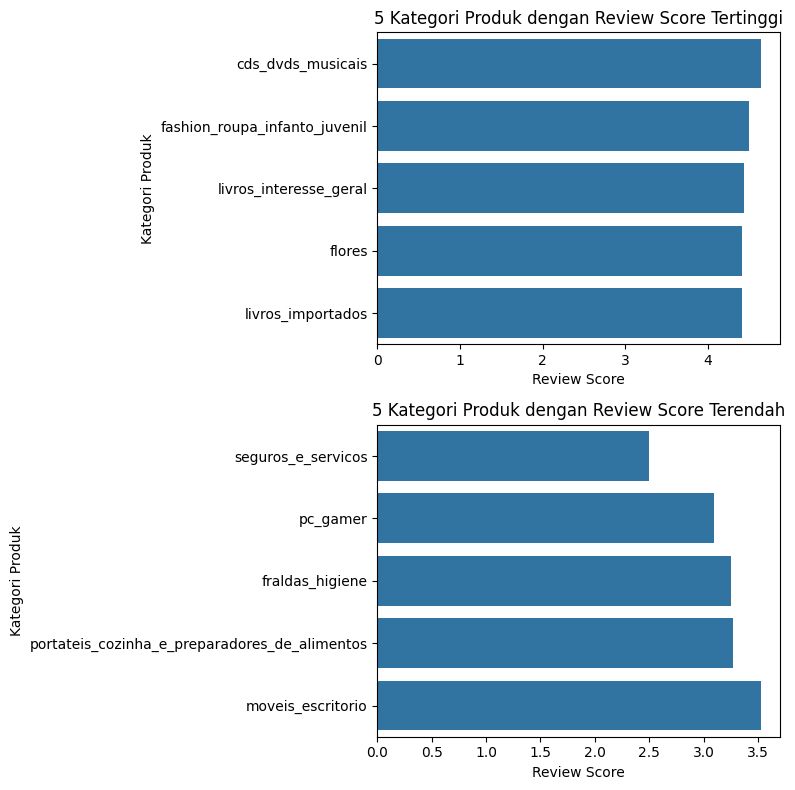

In [492]:
# Visualisasi bar chart untuk menampilkan kategori barang dengan perolehan reviews terbaik dan terburuk
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Agregasi nilai review_score berdasarkan product_category_name
avg_review_score = all_df.groupby('product_category_name')['review_score'].mean().reset_index()

# Urutkan data berdasarkan review_score (tertinggi)
sorted_review_score_desc = avg_review_score.sort_values(by='review_score', ascending=False).head(5)

# Visualisasi bar chart untuk review score tertinggi
sns.barplot(x='review_score', y='product_category_name', data=sorted_review_score_desc, ax=ax[0])
ax[0].set_title('5 Kategori Produk dengan Review Score Tertinggi')
ax[0].set_ylabel('Kategori Produk')
ax[0].set_xlabel('Review Score')

# Urutkan data berdasarkan review_score (terendah)
sorted_review_score_asc = avg_review_score.sort_values(by='review_score', ascending=True).head(5)

# Visualisasi bar chart untuk review score terendah
sns.barplot(x='review_score', y='product_category_name', data=sorted_review_score_asc, ax=ax[1])
ax[1].set_title('5 Kategori Produk dengan Review Score Terendah')
ax[1].set_ylabel('Kategori Produk')
ax[1].set_xlabel('Review Score')

plt.tight_layout()
plt.show()

### Pertanyaan 2: Kategori barang atau items apa saja yang paling banyak terjual berdasarkan lokasinya?

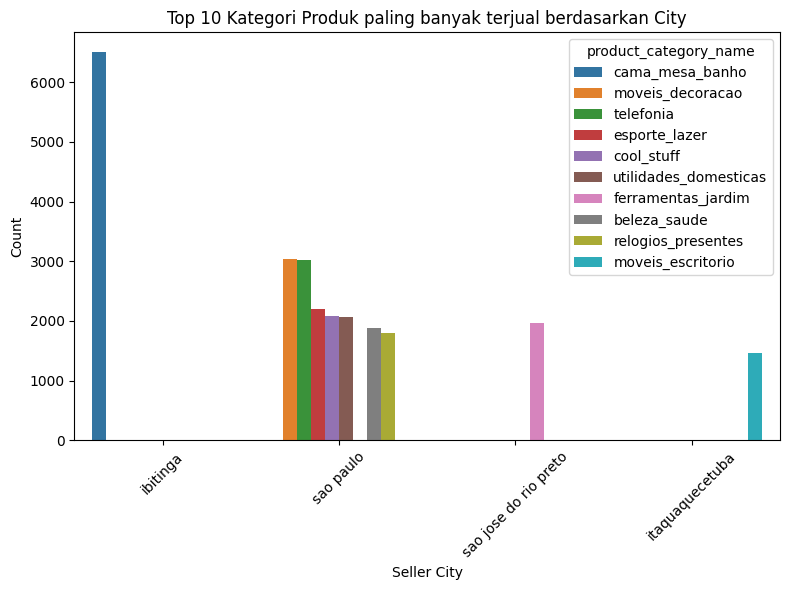

In [493]:
# Visualisasi Grouped Bar Chart kategori barang atau items yang paling banyak terjual berdasarkan city

# Mengelompokkan data berdasarkan 'seller_city' dan menghitung frekuensi dari setiap kategori produk
top_product_per_city = all_df.groupby('seller_city').product_category_name.value_counts().sort_values(ascending=False).head(10)

# Mengubah hasil groupby menjadi DataFrame
top_product_per_city_df = top_product_per_city.reset_index(name='count')

plt.figure(figsize=(8, 6))
sns.barplot(
    x='seller_city',
    y='count',
    hue='product_category_name',
    data=top_product_per_city_df
)

# Menambahkan label dan judul
plt.title('Top 10 Kategori Produk paling banyak terjual berdasarkan City')
plt.xlabel('Seller City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan plot
plt.show()

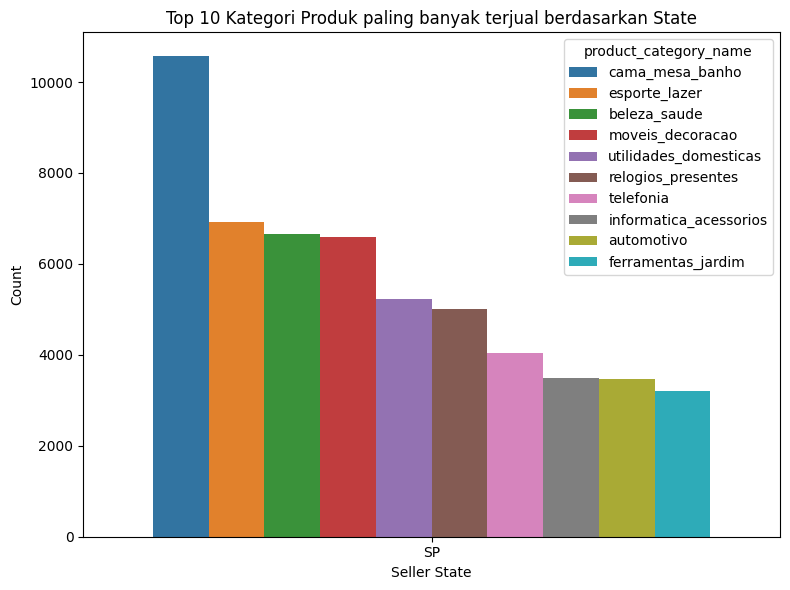

In [494]:
# Visualisasi Grouped Bar Chart kategori barang atau items yang paling banyak terjual berdasarkan state

# Mengelompokkan data berdasarkan 'seller_state' dan menghitung frekuensi dari setiap kategori produk
top_product_per_state = all_df.groupby('seller_state').product_category_name.value_counts().sort_values(ascending=False).head(10)

# Reset index untuk mengubah hasil menjadi DataFrame
top_product_per_state_df = top_product_per_state.reset_index(name='count')

plt.figure(figsize=(8, 6))
sns.barplot(
    x='seller_state',
    y='count',
    hue='product_category_name',
    data=top_product_per_state_df
)

# Menambahkan label dan judul
plt.title('Top 10 Kategori Produk paling banyak terjual berdasarkan State')
plt.xlabel('Seller State')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

# Menampilkan plot
plt.show()

### Pertanyaan 3: Di mana lokasi Seller dengan pendapatan terbanyak?

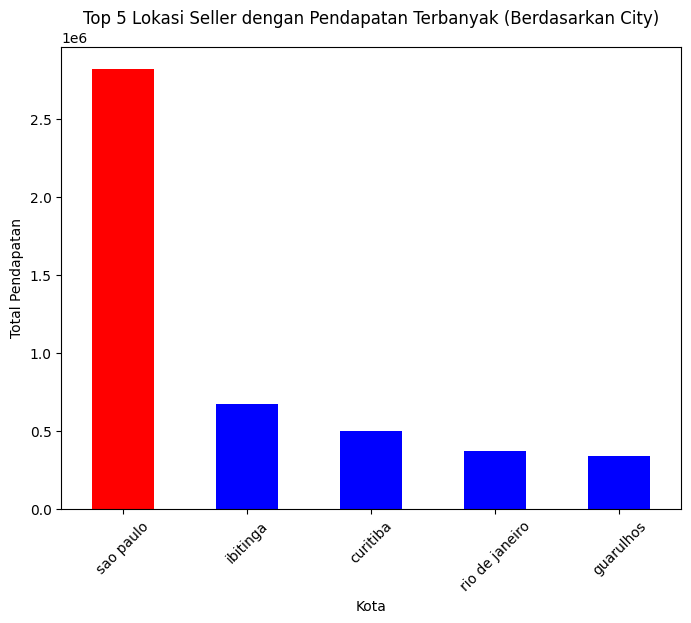

In [495]:
# Visualisasi bar chart untuk menampilkan lokasi seller dengan pendapatan terbanyak berdasarkan city

# Hitung total pendapatan untuk setiap kota
city_revenue = all_df.groupby('seller_city')['price'].sum().sort_values(ascending=False).head(5)

# Buat list warna, semua warna sama kecuali nilai tertinggi
colors = ['b' if (x < city_revenue.max()) else 'r' for x in city_revenue]

plt.figure(figsize=(8, 6))
city_revenue.plot(kind='bar', color=colors)

plt.title('Top 5 Lokasi Seller dengan Pendapatan Terbanyak (Berdasarkan City)')
plt.xlabel('Kota')
plt.ylabel('Total Pendapatan')
plt.xticks(rotation=45)
plt.show()

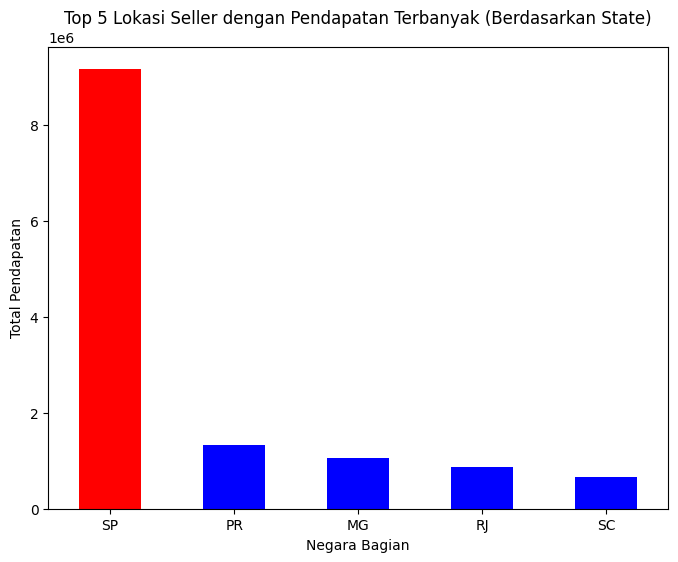

In [496]:
# Visualisasi bar chart untuk menampilkan lokasi seller dengan pendapatan terbanyak berdasarkan state

# Hitung total pendapatan untuk setiap kota
state_revenue = all_df.groupby('seller_state')['price'].sum().sort_values(ascending=False).head(5)

# Buat list warna, semua warna sama kecuali nilai tertinggi
colors = ['b' if (x < state_revenue.max()) else 'r' for x in state_revenue]

plt.figure(figsize=(8, 6))
state_revenue.plot(kind='bar', color=colors)

plt.title('Top 5 Lokasi Seller dengan Pendapatan Terbanyak (Berdasarkan State)')
plt.xlabel('Negara Bagian')
plt.ylabel('Total Pendapatan')
plt.xticks(rotation=0)
plt.show()

### Pertanyaan 4: Kategori barang apa saja yang menghasilkan freight value (ongkir) terbanyak dan paling sedikit?

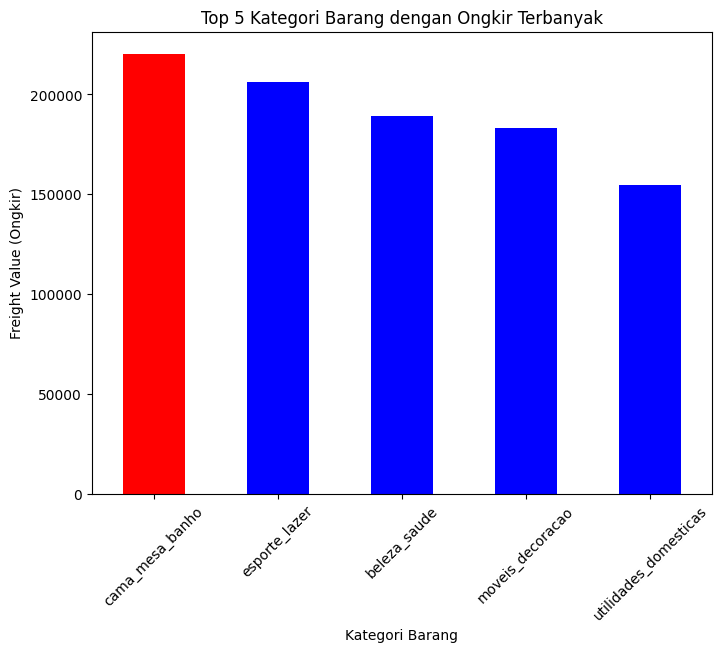

In [497]:
# Visualisasi bar chart untuk menampilkan kategori produk dengan terbanyak dan paling sedikit

# Hitung total freight_value (ongkir) untuk setiap kota
freight_value_most = all_df.groupby('product_category_name')['freight_value'].sum().sort_values(ascending=False).head(5)

# Buat list warna, semua warna sama kecuali nilai tertinggi
colors = ['b' if (x < freight_value_most.max()) else 'r' for x in freight_value_most]

plt.figure(figsize=(8, 6))
freight_value_most.plot(kind='bar', color=colors)

plt.title('Top 5 Kategori Barang dengan Ongkir Terbanyak')
plt.xlabel('Kategori Barang')
plt.ylabel('Freight Value (Ongkir)')
plt.xticks(rotation=45)
plt.show()

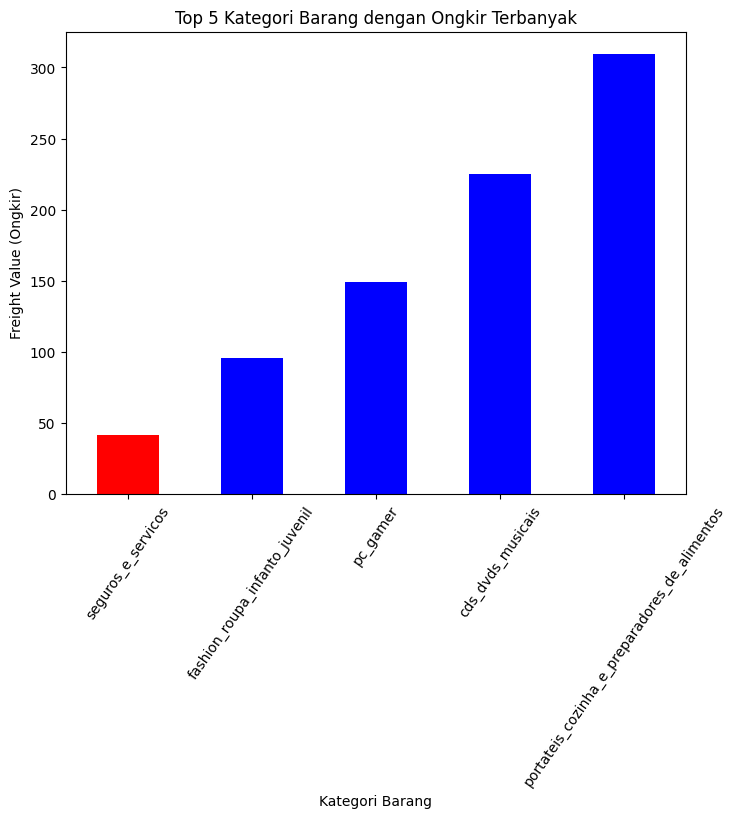

In [498]:
# Hitung total freight_value (ongkir) untuk setiap kota
freight_value_less = all_df.groupby('product_category_name')['freight_value'].sum().sort_values(ascending=True).head(5)

# Buat list warna, semua warna sama kecuali nilai tertinggi
colors = ['r' if (x == freight_value_less.min()) else 'b' for x in freight_value_less]

plt.figure(figsize=(8, 6))
freight_value_less.plot(kind='bar', color=colors)

plt.title('Top 5 Kategori Barang dengan Ongkir Terbanyak')
plt.xlabel('Kategori Barang')
plt.ylabel('Freight Value (Ongkir)')
plt.xticks(rotation=55)
plt.show()

### Pertanyaan 5: RFM Analysis, berikut beberapa pertanyaannya yang meliputi Recency, Frequency, dan Monetary:



1.   Kapan terakhir kali pelanggan melakukan transaksi?

1.   Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
2.   Berapa banyak total pengeluaran pelanggan dalam beberapa bulan terakhir?



### Karena nilai customer_id merupakan bentuk acak dari gabungan beberapa huruf dan angka, kita perlu mengubah nya menjadi bentuk angka tunggal bulat seperti 1,2,3 dan seterusnya. Sebelum itu, kita perlu mengecek apakah nilai customer_id memiliki nilai double atau hanya satu di setiap baris pada dataset customers.

In [499]:
# Mengecek dengan cara sampel acak apakah customer_id memiliki nilai yang sama atau berbeda
customers_df[customers_df['customer_id'] == '0001fd6190edaaf884bcaf3d49edf079']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
63792,0001fd6190edaaf884bcaf3d49edf079,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES


### Berikutnya, kita buat RFM Analysis terlebih dahulu menggunakan variabel rfm_df.

In [500]:
# RFM Analysis
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,293
1,000161a058600d5901f007fab4c27140,1,54.90,414
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,552
3,0002414f95344307404f0ace7a26f1d5,1,149.90,383
4,000379cdec625522490c315e70c7a9fb,1,93.00,154


In [501]:
# Membuat kolom baru customer_id_numeric untuk menyimpan customer_id dalam bentuk angka
rfm_df['customer_id_numeric'] = pd.factorize(rfm_df['customer_id'])[0] + 1
rfm_df.head()

,customer_id,frequency,monetary,recency,customer_id_numeric
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,293,1
1,000161a058600d5901f007fab4c27140,1,54.90,414,2
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,552,3
3,0002414f95344307404f0ace7a26f1d5,1,149.90,383,4
4,000379cdec625522490c315e70c7a9fb,1,93.00,154,5


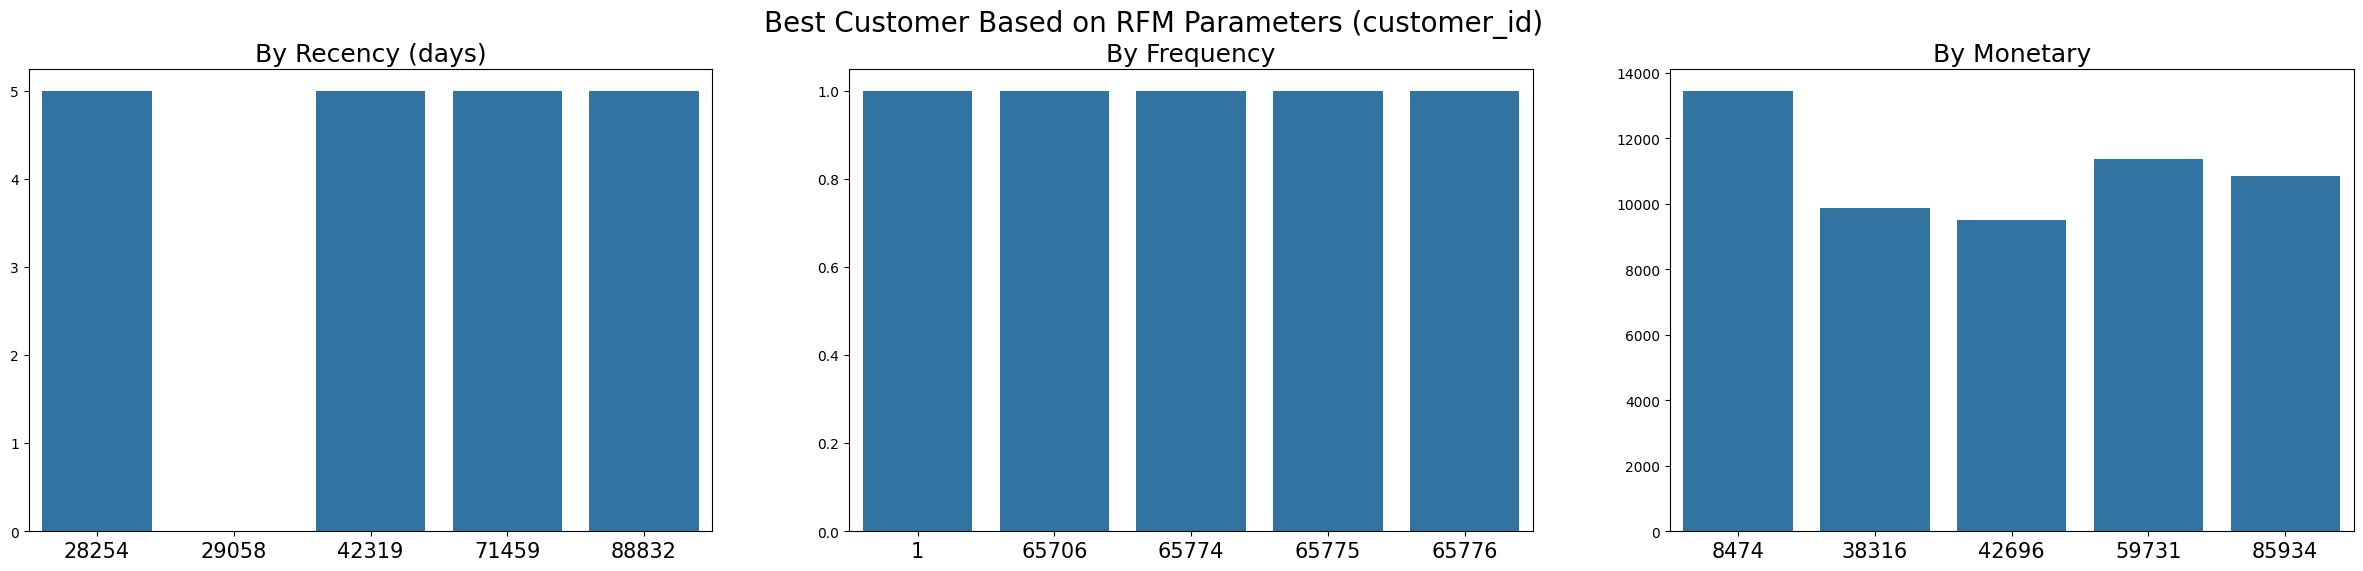

In [502]:
# Visualisasi hasil RFM Analysis
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.barplot(y="recency", x="customer_id_numeric", data=rfm_df.sort_values(by="recency", ascending=True).head(5), ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id_numeric", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id_numeric", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight:**
## **Kategori Produk dengan Review Score**
- Berdasarkan hasil visualisasi di atas, saya tampilkan 5 kategori produk dengan perolehan review score tertinggi, dan yang menempati urutan pertama adalah kategori produk dengan nama cds__dvds_musicais yang hampir menyentuh 5 review score (rentang review score dari 1-5)
- Untuk yang 5 kategori produk dengan perolehan review score terendah, dan yang menempati urutan pertama adalah kategori produk dengan nama seguros_e_servicos yang memperoleh nilai review score sebesar 2.5.

## **Kategori Produk yang Paling Banyak Terjual Berdasarkan Lokasinya**
- Berdasarkan hasil visualisasi di atas, saya tampilkan 10 kategori produk dengan penjualan terbanyak berdasarkan city, dan yang menempati urutan pertama adalah kategori produk dengan nama cama_mesa_banho sebanyak lebih dari 6000 total penjualan. Dan dari top 10 produk dengan penjualan terbanyak, berada di city (kota) sao paulo, yaitu sebanyak 9921 karena tidak hanya menjualkan 1 kategori produk saja, tetapi 7 kategori produk.
- Jika berdasarkan state, saya tampilkan 10 kategori produk dengan penjualan terbanyak berada di state (negara bagian) SP. Dan yang menempati urutan pertama kategori produk dengan penjualan terbanyak adalah cama_mesa_banho.

## **Lokasi Seller dengan Pendapatan Terbanyak**
- Berdasarkan hasil visualisasi di atas, saya tampilkan 5 Seller city yang pendapatannya terbanyak, dan yang menempati urutan pertama adalah sao paulo dengan pendapatan sebesar ±R$2.7 juta Real Brasil (Brasil karena nama kota dan negara bagian nya berada di Brasil).

- Jika Berdasarkan negara bagian, saya tampilkan juga 5 Seller state yang pendapatannya terbanyak, dan yang menempati urutan pertama adalah SP dengan pendapatan sebesar ±R$8.7 juta Real Brasil.

## **Kategori Barang yang Meghasilkan freight_value (ongkir) Terbanyak**
- Berdasarkan hasil visualisasi di atas, saya tampilkan 5 kategori produk dengan perolehan freight_value (ongkir) terbanyak, dan yang menempati urutan pertama kategori produk dengan nama cama_mesa_banho dengan perolehan freight_value sebesar ±R$204693.04 Real Brasil.

- Untuk 5 kategori produk dengan perolehan freight_value (ongkir) terendah, dan yang menempati urutan pertama kategori produk dengan nama seguros_e_servicos dengan perolehan freight_value sebesar ±R$41.22 Real Brasil.

## **RFM Analysis**
- Recency, berdasarkan hasil visualisasi di atas, diambil 5 sampel pelanggan teratas, 4 dari 5 sampel pelanggan melakukan pembayaran atau transaksi terakhir 5 hari yang lalu. Sedangkan 1 dari 5 sampel, yaitu sebanyak 29058 pelanggan masih baru-baru ini melakukan transaksi.

- Frequency, berdasarkan hasil visualisasi di atas, diambil 5 sampel pelanggan teratas, dari keseluruhan 5 sampel, pelanggan bertransaksi sebanyak 1 kali dari keseluruhan pelanggan yang diambil 5 sampel.

- Monetary, berdasarkan hasil visualisasi di atas, diambil 5 sampel pelanggan teratas, sebanyak 8474 pelanggan menghabiskan uangnya sebesar ±R$13900 Real Brasil.

- Dan untuk pelanggan terbanyak dengan total 85934 menghabiskan uangnya sebesar ±R$11000 Real Brasil.

## Analisis Lanjutan (Opsional)

## Conclusion

- Kesimpulan pertanyaan 1, **Kategori barang mana saja yang paling banyak memperoleh reviews terbaik dan terburuk?** Untuk kategori barang yang memiliki review terbaik, kita tetap pertahankan kualitas nya. Dan untuk kategori barang dengan review terburuk, kita usahakan untuk menaikkan kualitasnya, meningkatkan pelayanan terbaik kepada pelanggan, dan pemberian garansi serta servis gratis jika terjadi masalah pada kategori barang elektronik.

- Kesimpulan pertanyaan 2, **Kategori barang atau items apa saja yang paling banyak terjual berdasarkan lokasinya?** Jika dilihat berdasarkan city dan state, kategori produk dengan nama cama_mesa_banho paling banyak terjual, selisihnya pun cukup jauh dengan kategori produk lainnya. Agar kategori produk lain memiliki jumlah penjualan yang dapat mendekati atau sama jumlah penjualannya, kategori produk tersebut perlu diberi harga promo, diperbaiki kualitasnya, dan diberikan bonus tambahan (misal beli rinso dapat sabun sunlight 250ml).

- Kesimpulan pertanyaan 3, **Di mana lokasi Seller dengan pendapatan terbanyak?** Untuk lokasi Seller baik itu berdasarkan kelompok city dan state, dan untuk yang memiliki pendapatan sedikit, perlu diadakan pesta promo dan hadiah agar menarik para pelanggan yang ada di lokasi tersebut untuk membeli produk yang dijual di Seller yang ada di lokasi tersebut. Dan untuk lokasi Seller baik itu berdasarkan kelompok city dan state dengan pendapatan terbanyak, kita juga dapat mengadakan pesta promo dan hadiah, terutama bagi pelanggan yang sering membeli produk di lokasi tersebut.

- Kesimpulan pertanyaan 4. **Kategori barang apa saja yang menghasilkan freight value (ongkir) terbanyak dan paling sedikit?** Bagi kategori barang yang menghasilkan freight value (ongkir) terbanyak, akan mendapatkan potongan ongkir hingga gratis ongkir.

- Kesimpulan pertanyaan 5. **RFM Analysis**


1.   **Recency**, banyak pelanggan yang sudah tidak bertransaksi selama 5 hari, kita perlu menarik perhatian mereka agar membeli produk yang tersedia dengan cara iklan atau ads, bisa melalui televisi, email, brosur, pamflet, dan sebagainya, lalu memberikan promo menarik atau ada produk terbaru dengan harga dan hadiah menarik untuk mereka agar dapat melakukan pembelian produk atau transaksi kembali.
2.   **Frequency**, rata-rata pelanggan hanya melakukan transaksi sebanyak 1 kali, kita perlu menawarkan produk-produk menarik tentunya dengan promo atau mengadakan promosi pembelian ulang, jadi bagi pelanggan yang melakukan pembelian lagi dan lagi akan mendapatkan sebuah promosi.

1.   **Monetary**, bagi pelanggan yang menghabiskan uangnya paling banyak untuk melakukan transaksi, kita perlu beri mereka layanan eksklusif atau produk premium untuk mempertahankan mereka.




